In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import shapiro,kstest, probplot
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [55]:
df_teste = pd.read_csv('./datasets/pontuacao_teste.csv')
df_teste.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [56]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


## EDA

In [57]:
df_teste.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

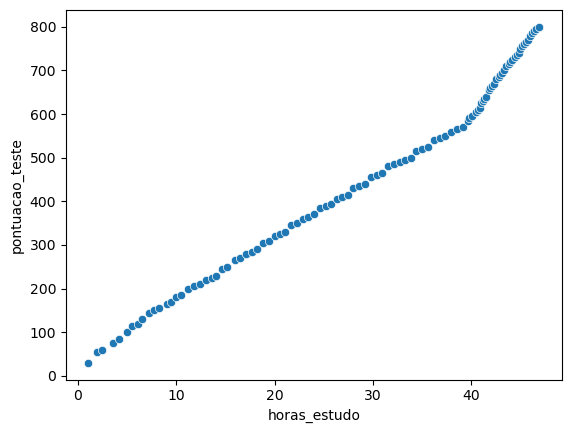

In [58]:
# plot de dispersão 
# X = horas_estudo
# y = pontuacao_teste

sns.scatterplot(data=df_teste, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

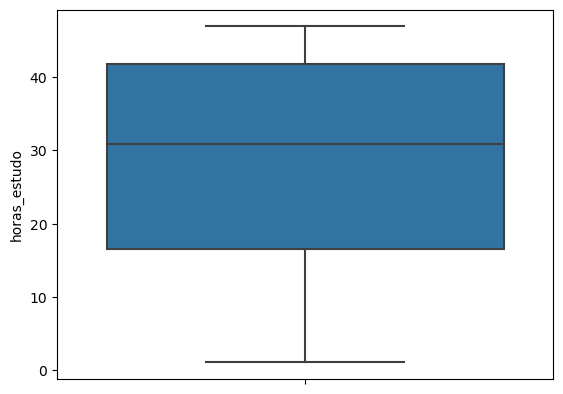

In [59]:
# verificar se temos outliers

sns.boxplot(df_teste, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

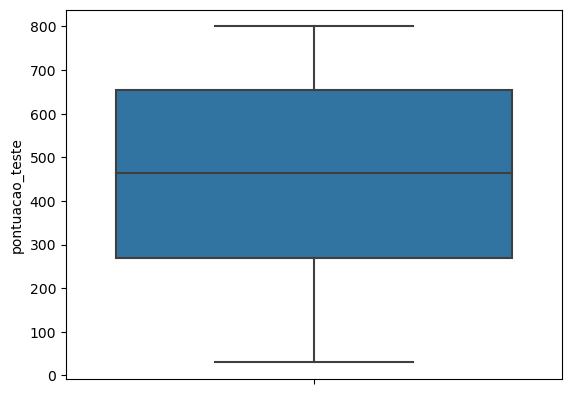

In [60]:
sns.boxplot(df_teste, y='pontuacao_teste')


<Axes: >

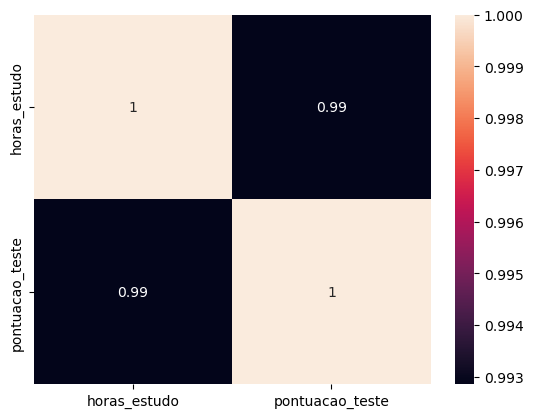

In [61]:
sns.heatmap(df_teste.corr('pearson'), annot=True)

<Axes: >

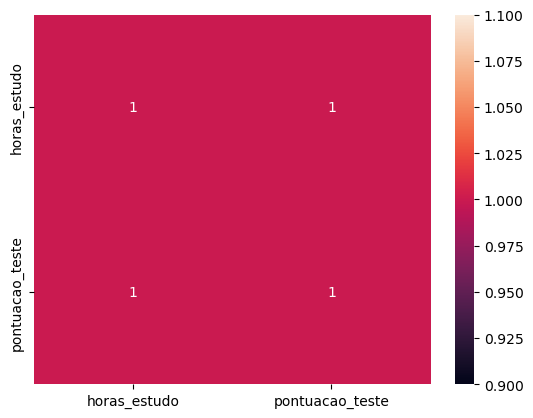

In [62]:
sns.heatmap(df_teste.corr('spearman'), annot=True)


c:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


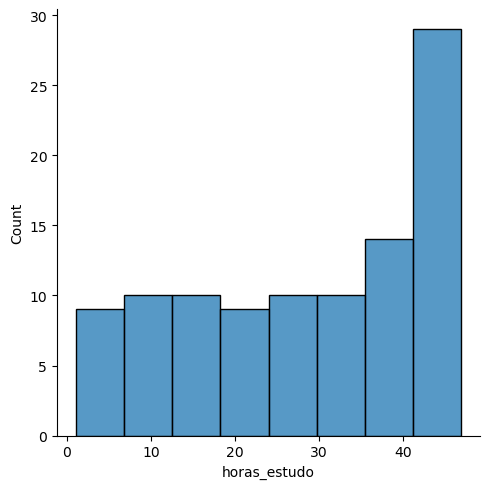

In [63]:
sns.displot(df_teste, x='horas_estudo')

c:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


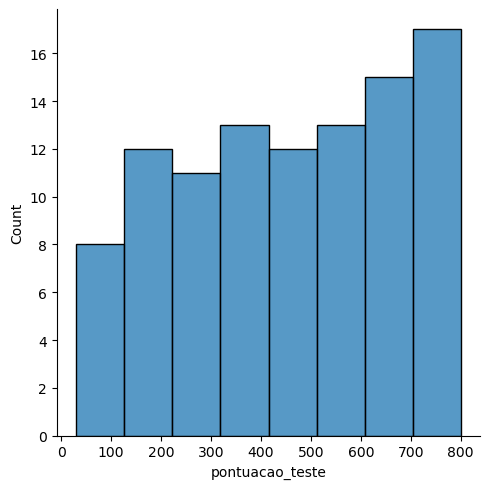

In [64]:
sns.displot(df_teste, x='pontuacao_teste')

## Treinar modelo

In [65]:
# quando temos apenas uma feature, precisamos ajustar o shape

X = df_teste['horas_estudo'].values.reshape(-1,1)
y = df_teste['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50)

In [66]:
reg_model = LinearRegression()

In [67]:
reg_model.fit(X_train,y_train)

LinearRegression()

## Validar Modelo - Métricas

In [68]:
y_pred = reg_model.predict(X_test)

In [69]:
# Calcular métrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela variável independente
r2_score(y_test,y_pred)

0.9828400452912442

In [70]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Media (y_test - y_pred)
# menos sensivel a outliers
mean_absolute_error(y_test,y_pred)

22.957470277134608

In [71]:
# Calcular métrica RMSE (Square Root Mean Squared Error)
# MSE = Raiz (Média (y_test - Y_pred ) 2)
# é uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros

mean_squared_error(y_test,y_pred, squared=False)

27.69471608884342

In [72]:
# Parei no RMSE voltar a ver